# Mini Projet : Intro ML

**Problèmatique** : 

In [27]:
#importer des librairies
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import sklearn as sk;

## 1) Analyse graphique des données (Dataviz)

### 1) Import du dataset et cleaning 

In [76]:
films = pd.read_csv("netflix_titles.csv")
#https://www.kaggle.com/shivamb/netflix-shows

In [77]:
#films.drop(['Unnamed: 0'], axis='columns', inplace = True)
films.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [78]:
films.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

#### 1.1) Diagrammes de répartition des données (type gaussienne sur les données) 

Affichage du premier graphe, representant le nombre de films/ series par durée en minutes

In [79]:
cond = films[['duration']].apply(lambda x:x.str.contains('Season|Seasons',regex =True)).any(axis =1)
graph1 = films[~cond]
graph1.index = np.arange(len(graph3))
lst1 =[]
for i in graph1.duration:
    if i[2]=='m':
        lst1.append(int(i[:2]))
    else:
        lst1.append(int(i[:3]))
graph3['Duree'] = lst1    

<ipython-input-79-8f4409ef9f66>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph3['Duree'] = lst1


Forme de l'histogramme et nom des axes

c:\users\bapti\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Nombre de films/series par duree en minutes')

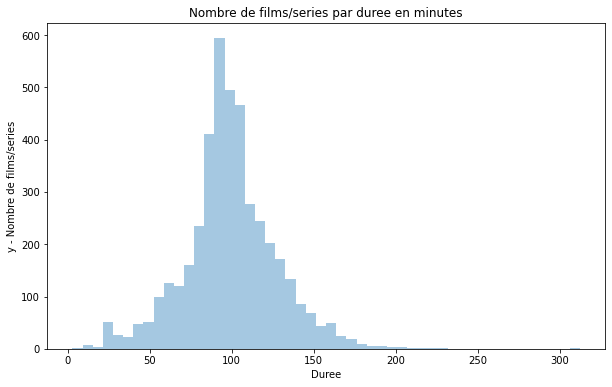

In [80]:
plt.figure(figsize =(10,6))
plt.xlabel('x - Nombre de films/series ')
plt.ylabel('y - Nombre de films/series')
sns.distplot(graph3.Duree,kde =False)
plt.title('Nombre de films/series par duree en minutes')

Code exemple pour pie chart/ à revoir

In [72]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = films['duration']
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

NameError: name 'films' is not defined

Import de Pie chart pour faire un diagramme camembert

In [107]:
import matplotlib
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=None, data=None)>

In [108]:
query5 = films.title.groupby([films.type,films.release_year,films.country]).count()

In [110]:
sub_query9=query5[('TV Show',2019,)].sort_values(ascending = False)[:10]
plt.figure(figsize =(10,10))
plt.pie(y = sub_query9.index,x = sub_query9.values)
plt.title()

TypeError: pie() got an unexpected keyword argument 'y'

<Figure size 720x720 with 0 Axes>

#### 1.2) Vérification du nombre de données, si plusieurs données sont peu représentés (<3%) alors regrouper dans une seule et même catégorie, 1 pie chart avant/apres

#### 1.3) Nettoyage des données manquantes, encodage (OneHot, dictionnaire ou Sklearn Encoder) 

#### 1.4) Boites à moustache avec données extrêmes 

#### 1.5) Heatmap + observations sur les corrélations

## 2) Model Building 

#### 2.1) 2 algorithmes avec 2 paramètres différents (ex: max_depth, n_estimators,….) que vous expliquerez en commentaire 

#### 2.2) Affichage des coefficients/ accuracy 

TO DO:
remplacer movie et tv show par un code (1 et 2) pour pouvoir calculer la correlartion entre la duree et le type
creation d'une nouvelle colonne type categ (1=Movie, 2=TV Show)

In [102]:
#définir 2 variables de travail
#X := les features à utiliser f
#Y := la target (prix)

X=films['type']
Y=films['duration']

In [103]:
X.head()

0      Movie
1      Movie
2    TV Show
3    TV Show
4      Movie
Name: type, dtype: object

In [104]:
Y.head()

0      90 min
1      94 min
2    1 Season
3    1 Season
4      99 min
Name: duration, dtype: object

In [105]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [94]:
X_train

,type,country
1034,Movie,NaN
2960,Movie,United States
2873,Movie,United States
3270,Movie,Indonesia
6160,TV Show,United States
...,...,...
3772,Movie,United States
5191,Movie,United States
5226,Movie,Turkey
5390,Movie,United States


In [95]:
len(X_test)

1871

In [96]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

In [97]:
lin_model.fit(X_train, Y_train)

ValueError: could not convert string to float: 'Movie'

In [98]:
lin_model.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [99]:
Y_test

599      1 Season
5818    2 Seasons
5386     1 Season
401        88 min
1268      105 min
          ...    
4850       95 min
3593      101 min
3307     1 Season
1702     1 Season
3711     1 Season
Name: duration, Length: 1871, dtype: object

In [100]:
lin_model.score(X_test, Y_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## 3) Feature Importance

#### 3.1) Affichage sous forme de barplot

In [86]:
graph6 = [('TV Show',)].sort_values(ascending =False)[:10]
plt.figure(figsize =(10,10))
plt.title('Pays avec le plus de series')
sns.barplot(y = graph6.index,x = graph6.values)

AttributeError: 'list' object has no attribute 'sort_values'

#### 3.2) Autre forme d’affichage si vous avez le temps  

## 4) Model Réexécution avec les features sélectionnés 

#### 4.1) Affichage des metrics standard et commentaire sur la pertinence 

#### 4.2) Voir PDF : Rapport de projet ML